# Ploting loss values

**Author(s):**  Zhanxiang Sun [@seansunn](https://github.com/seansunn), Harvey Mannering [@harveymannering](https://github.com/harveymannering) and Miguel Xochicale [@mxochicale](https://github.com/mxochicale)   

**Contributor(s):** Michelle Iskandar [@michellepi](https://github.com/michellepi)


## Introduction

This notebook presents prototypes for demographic analysis of participants.

### Running notebook
Go to repository path: `cd $HOME/repositories/budai4medtech/midl2023/notebooks`   
Open repo in pycharm and in the terminal type:
```
git checkout master # or the branch
git pull # to bring a local branch up-to-date with its remote version
```
Launch Notebook server:
```
conda activate febusisVE
jupyter notebook --browser=firefox
```
which will open your web-browser.


### Logbook
* 5 April 2023: adds notebook

### References
* 




# 2. Jupyter Notebook
## 2.1 Setting imports and datasets paths

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/budai4medtech/midl2023'
FULL_REPO_PATH = HOME_PATH+'/'+REPOSITORY_PATH
FULL_DATA_REPO_PATH_DSRGAN = FULL_REPO_PATH +'/data/dsr-gan/'
FULL_DATA_REPO_PATH_TBGAN = FULL_REPO_PATH +'/data/styleswin-gan/'


##Filenames
DSR_LOSS = FULL_DATA_REPO_PATH_DSRGAN + 'sr_gan_loss.csv'
DSR_FID = FULL_DATA_REPO_PATH_DSRGAN + 'FID.csv'


##Filenames
tc_200_2_FID_log_npy = FULL_DATA_REPO_PATH_TBGAN + 'tc_200_2_FID_log.npy'
tc_200_2_G_loss_log_npy = FULL_DATA_REPO_PATH_TBGAN + 'tc_200_2_G_loss_log.npy'
tc_200_2_D_loss_log_npy = FULL_DATA_REPO_PATH_TBGAN + 'tc_200_2_D_loss_log.npy'


In [2]:
def csv2df(PATH_FILENAMECSV):
# def csv2df(PATH_FILENAMECSV, name_of_the_column_STR, label_column_name_STR):    
    head_read_csv= pd.read_csv(PATH_FILENAMECSV, sep=",")
    df = pd.DataFrame(head_read_csv)
    #df.insert(0, name_of_the_column_STR, label_column_name_STR, True) 
    #df = df.reset_index()
    #df.rename(columns={"index": "epoch"}, inplace=True)
    return df


## 2.2 Loading DSRGAN loss and FID values


In [3]:
df_dsr_loss = csv2df(DSR_LOSS)
df_dsr_loss['log_G_loss'] = np.log2(df_dsr_loss['Generator_Loss'])
df_dsr_loss['log_D_loss'] = np.log2(df_dsr_loss['Disciminator_Loss'])
# df_dsr_loss = csv2df(DSR_LOSS, 'Model', 'DSRGAN')
# df_dsr_loss = df_dsr_loss.drop(columns=['Epoch', 'FID'])
# df_dsr_loss

df_dsr_fid = csv2df(DSR_FID)
df_dsr_fid.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)
print(df_dsr_fid)
FID_mean_dsrgan = df_dsr_fid['FID'].mean()
print(f'FID_mean: {FID_mean_dsrgan}')
lowest_FID_dsrgan = df_dsr_fid['FID'].min() 
print(f'lowest_FID: {lowest_FID_dsrgan}')

    Epochs       FID
0        0  7.056298
1       10  5.094815
2       20  6.353732
3       30  6.094478
4       40  7.012405
5       50  6.867018
6       60  6.853008
7       70  6.966198
8       80  7.972830
9       90  7.056210
10     100  7.505734
11     110  7.421794
12     120  7.857598
13     130  6.602067
14     140  7.021198
15     150  7.382382
16     160  7.294218
17     170  7.258928
18     180  7.240422
19     190  7.436068
20     200  7.533785
FID_mean: 7.041961193084717
lowest_FID: 5.09481477737427


## 2.3 Loading TBGAN loss and FID values


In [4]:
tc_200_2_FID_log = np.load(tc_200_2_FID_log_npy)
tc_200_2_G_loss_log = np.load(tc_200_2_G_loss_log_npy)
tc_200_2_D_loss_log = np.load(tc_200_2_D_loss_log_npy)

df_tbgan_loss = pd.DataFrame({'log_G_loss': tc_200_2_G_loss_log, 'log_D_loss': tc_200_2_D_loss_log})
df_tbgan_loss['log_G_loss'] = np.log2(df_tbgan_loss['log_G_loss'])
df_tbgan_loss['log_D_loss'] = np.log2(df_tbgan_loss['log_D_loss'])
df_tbgan_loss 
    
df_tbgan_FID = pd.DataFrame({'FID': tc_200_2_FID_log})
df_tbgan_FID = df_tbgan_FID.reset_index()
df_tbgan_FID.rename(columns={"index": "Epochs"}, inplace=True)
df_tbgan_FID['Epochs'] = 10*df_tbgan_FID['Epochs']+10

print(df_tbgan_FID)
FID_mean_tbgan = df_tbgan_FID['FID'].mean() 
print(f'FID_mean: {FID_mean_tbgan}')
lowest_FID_tbgan = df_tbgan_FID['FID'].min() 
print(f'lowest_FID: {lowest_FID_tbgan}')


    Epochs        FID
0       10  37.187801
1       20  33.604580
2       30  38.332794
3       40  34.117149
4       50  35.254444
5       60  28.930210
6       70  33.872005
7       80  41.983688
8       90  41.515812
9      100  36.993744
10     110  35.893261
11     120  34.841686
12     130  34.751270
13     140  33.860901
14     150  35.044064
15     160  38.502182
16     170  33.264282
17     180  35.319431
18     190  42.501560
19     200  34.633411
FID_mean: 36.02021389007568
lowest_FID: 28.93021011352539


## 2.4 Ploting losses


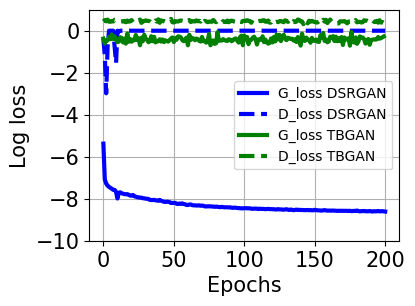

In [5]:
plt.rcParams['figure.figsize'] = [4, 3]#[width, height]
plt.rcParams['axes.labelsize'] = 15
linewidth = 3
font_tick_size = 15

plt.plot(df_dsr_loss['log_G_loss'],label='G_loss DSRGAN', color='blue', linestyle='solid',linewidth=linewidth)
plt.plot(df_dsr_loss['log_D_loss'],label='D_loss DSRGAN', color='blue', linestyle='dashed',linewidth=linewidth)
plt.plot(df_tbgan_loss['log_G_loss'],label='G_loss TBGAN', color='green', linestyle='solid',linewidth=linewidth)
plt.plot(df_tbgan_loss['log_D_loss'],label='D_loss TBGAN', color='green',  linestyle='dashed',linewidth=linewidth)

plt.xlabel('Epochs')
plt.ylabel('Log loss')
plt.yticks(fontsize=font_tick_size)
plt.xticks(fontsize=font_tick_size)


plt.legend(loc="center right")
plt.ylim(-10, 1.0)
plt.grid(True)
plt.show()

## 2.5 Ploting FIDs


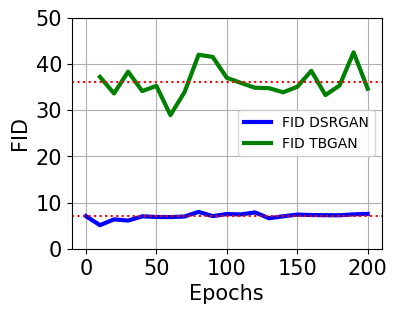

In [6]:
plt.rcParams['figure.figsize'] = [4, 3]#[width, height]
plt.rcParams['axes.labelsize'] = 15
linewidth = 3
font_tick_size = 15



plt.plot(df_dsr_fid['Epochs'], df_dsr_fid['FID'],label='FID DSRGAN', color='blue', linestyle='solid',linewidth=linewidth)
plt.plot(df_tbgan_FID['Epochs'], df_tbgan_FID['FID'],label='FID TBGAN', color='green', linestyle='solid',linewidth=linewidth)

plt.xlabel('Epochs')
plt.ylabel('FID')
plt.yticks(fontsize=font_tick_size)
plt.xticks(fontsize=font_tick_size)
plt.axhline(y = FID_mean_dsrgan, color = 'r', linestyle = ':', )
plt.axhline(y = FID_mean_tbgan, color = 'r', linestyle = ':', )


plt.legend(loc="center right")
plt.ylim(0, 50.0)
plt.grid(True)
plt.show()

